Packages

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal

#Load Dataset

In [10]:
import pandas as pd

benin = pd.read_csv(r'C:/Users/Daniel.Temesgen/Desktop/tutorial/kalm-week-0/solar-challenge-week1/datas/benin-malanville.csv')
sierra_leone = pd.read_csv(r'C:/Users/Daniel.Temesgen/Desktop/tutorial/kalm-week-0/solar-challenge-week1/datas/sierraleone-bumbuna.csv')
togo = pd.read_csv(r'C:/Users/Daniel.Temesgen/Desktop/tutorial/kalm-week-0/solar-challenge-week1/datas/togo-dapaong_qc.csv')

# Add a 'Country' column to each dataset for identification

In [11]:
benin['Country'] = 'Benin'
sierra_leone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine datasets for easier plotting

In [12]:
data = pd.concat([benin, sierra_leone, togo], ignore_index=True)

In [13]:
data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,Country
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN,Benin
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN,Benin
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN,Benin
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN,Benin
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN,Benin


## Boxplots of GHI, DNI, DHI by Country

# Set up the plotting area


In [14]:
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

# GHI Boxplot

C:\Users\Daniel.Temesgen\AppData\Local\Temp\ipykernel_34076\2107132335.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='GHI', data=data, palette='Set2')
C:\Users\Daniel.Temesgen\AppData\Local\Temp\ipykernel_34076\2107132335.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='DNI', data=data, palette='Set2')
C:\Users\Daniel.Temesgen\AppData\Local\Temp\ipykernel_34076\2107132335.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='DHI', data=data, palette='Set2')


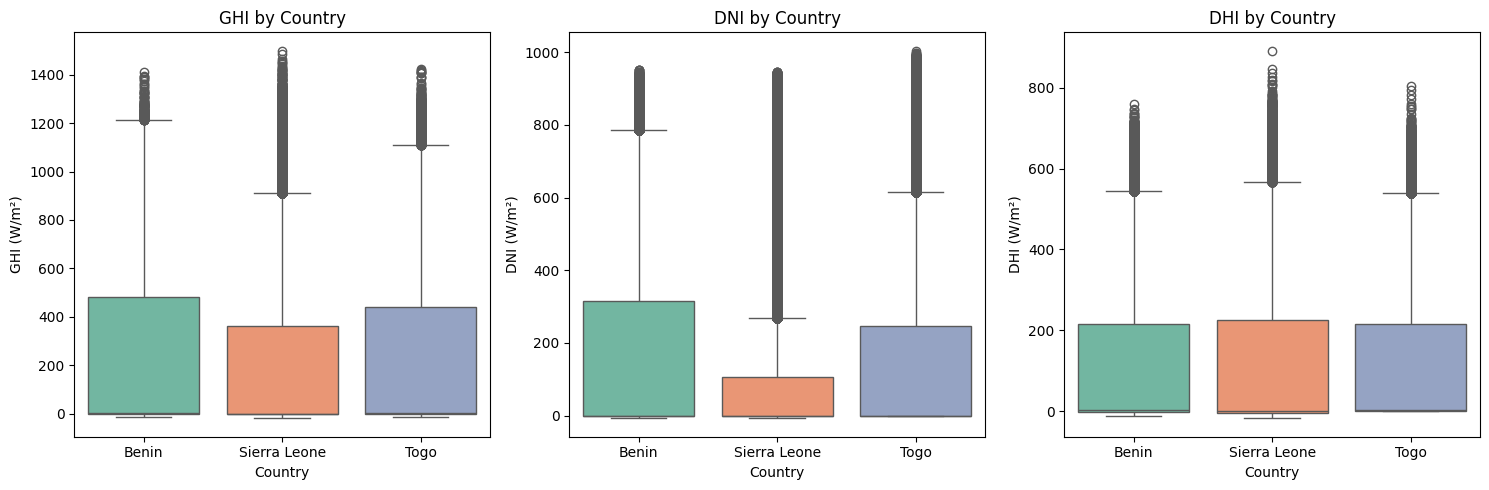

In [16]:
# Set up the plotting area
plt.figure(figsize=(15, 5))

# GHI Boxplot
plt.subplot(1, 3, 1)
sns.boxplot(x='Country', y='GHI', data=data, palette='Set2')
plt.title('GHI by Country')
plt.xlabel('Country')
plt.ylabel('GHI (W/m²)')

# DNI Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(x='Country', y='DNI', data=data, palette='Set2')
plt.title('DNI by Country')
plt.xlabel('Country')
plt.ylabel('DNI (W/m²)')

# DHI Boxplot
plt.subplot(1, 3, 3)
sns.boxplot(x='Country', y='DHI', data=data, palette='Set2')
plt.title('DHI by Country')
plt.xlabel('Country')
plt.ylabel('DHI (W/m²)')

plt.tight_layout()
plt.show()

In [ ]:
## Summary Table of GHI, DNI, DHI Statistics

In [17]:
# Calculate statistics
summary = data.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)

# Flatten column names for better readability
summary.columns = [f'{metric}_{stat}' for metric, stat in summary.columns]
print(summary)

# Optionally, display as a formatted table in the notebook
summary

              GHI_mean  GHI_median  GHI_std  DNI_mean  DNI_median  DNI_std  \
Country                                                                      
Benin           240.56         1.8   331.13    167.19        -0.1   261.71   
Sierra Leone    201.96         0.3   298.50    116.38        -0.1   218.65   
Togo            230.56         2.1   322.53    151.26         0.0   250.96   

              DHI_mean  DHI_median  DHI_std  
Country                                      
Benin           115.36         1.6   158.69  
Sierra Leone    113.72        -0.1   158.95  
Togo            116.44         2.5   156.52  


,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
Country,,,,,,,,,
Benin,240.56,1.8,331.13,167.19,-0.1,261.71,115.36,1.6,158.69
Sierra Leone,201.96,0.3,298.50,116.38,-0.1,218.65,113.72,-0.1,158.95
Togo,230.56,2.1,322.53,151.26,0.0,250.96,116.44,2.5,156.52


## Statistical Testing

In [18]:
# Extract GHI values for each country
ghi_benin = benin['GHI']
ghi_sierra_leone = sierra_leone['GHI']
ghi_togo = togo['GHI']

# Perform one-way ANOVA
anova_stat, anova_p = f_oneway(ghi_benin, ghi_sierra_leone, ghi_togo)
print(f"ANOVA p-value for GHI: {anova_p:.4f}")

# Optional: Kruskal-Wallis test (non-parametric alternative)
kruskal_stat, kruskal_p = kruskal(ghi_benin, ghi_sierra_leone, ghi_togo)
print(f"Kruskal-Wallis p-value for GHI: {kruskal_p:.4f}")

ANOVA p-value for GHI: 0.0000
Kruskal-Wallis p-value for GHI: 0.0000


## Key Observations

- **Highest GHI**: [Country with highest median GHI from boxplot, e.g., Benin] shows the highest median GHI, indicating strong solar potential, but [note variability, e.g., high spread in boxplot] suggests inconsistent conditions.
- **DNI Variability**: [Country, e.g., Sierra Leone] has the highest median DNI, but its standard deviation ([value from summary table]) is larger, indicating more variable direct solar radiation.
- **Significant Differences**: The ANOVA p-value ([insert p-value]) suggests [significant/no significant] differences in GHI across countries, implying [e.g., geographical or climatic factors may drive differences].

## Bonus: Average GHI Ranking

C:\Users\Daniel.Temesgen\AppData\Local\Temp\ipykernel_34076\592523404.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='Set2')


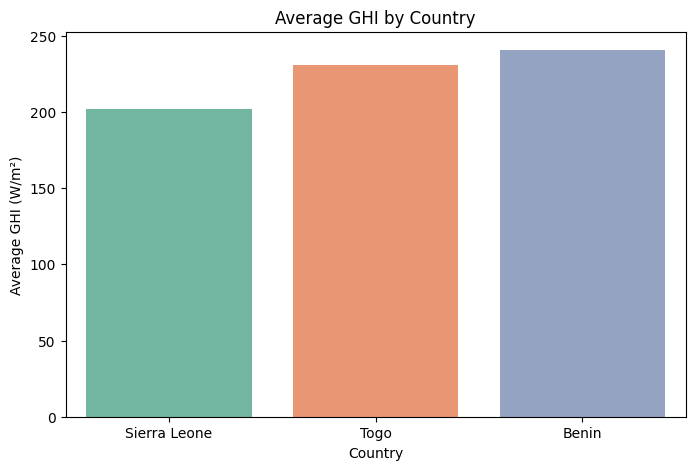

In [19]:
# Calculate average GHI by country
avg_ghi = data.groupby('Country')['GHI'].mean().sort_values()

# Create bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='Set2')
plt.title('Average GHI by Country')
plt.xlabel('Country')
plt.ylabel('Average GHI (W/m²)')
plt.show()